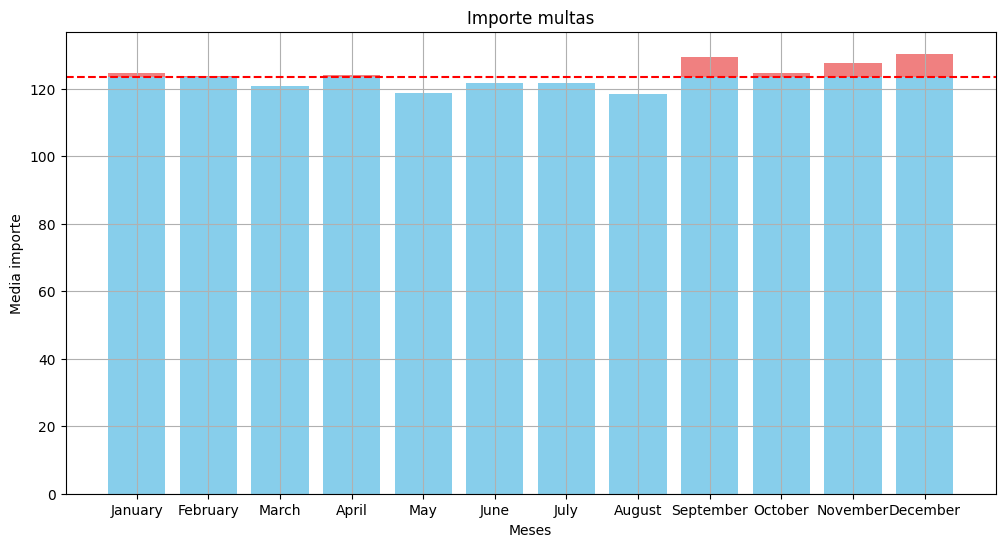

In [1]:
import calendar
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

with open ('Multas de Tráfico año 2018 Gijon.json', encoding='utf-8') as f:
    datos = json.load(f)

df = pd.DataFrame(datos['multas']['multa'])

media_total = df['importe'].mean()

meses = calendar.month_name[1:]

media_mes = {}
valores_aux = [{},{}]

for i in range(1,13):
    media_mes[i] = df[df ['mes'].astype(int) == i]['importe'].mean()
    if media_mes[i] > media_total:
        valores_aux[0][i] = media_total
        valores_aux[1][i] = media_mes[i] - media_total
    else:
        valores_aux[0][i] = media_mes[i]
        valores_aux[1][i] = 0


fig, ax = plt.subplots(figsize=(12, 6))

ax.axhline(y=media_total, color='red', linestyle='--', label=f'Media total ({media_total:.2f})')

bottom = np.zeros(12)
colores = ['skyblue', 'lightcoral']

for i in range(2):
    p = ax.bar(meses, valores_aux[i].values(), bottom=bottom, color=colores[i])
    bottom += media_total

ax.set_title('Importe multas')
ax.set_xlabel('Meses')
ax.set_ylabel('Media importe')
ax.grid(True)


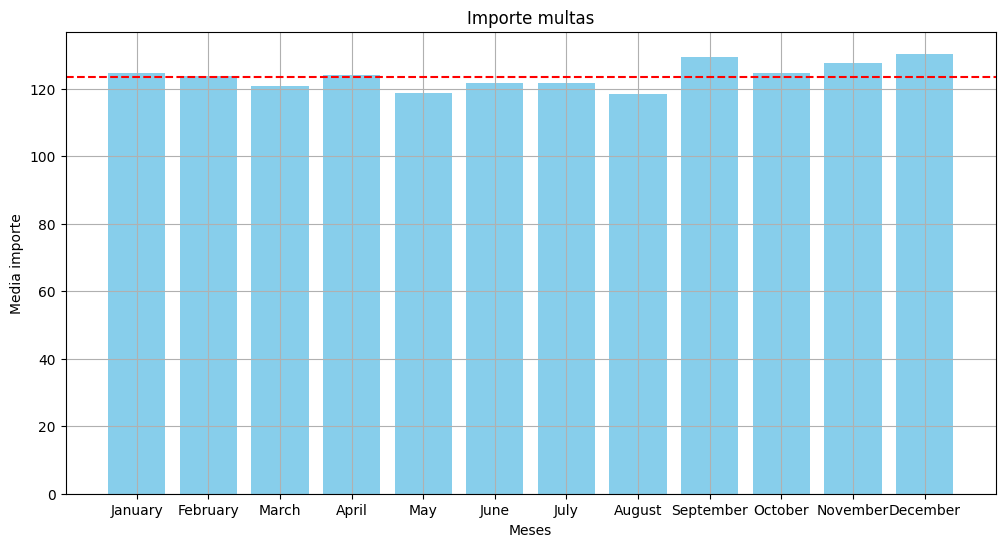

In [2]:
import calendar
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

with open ('Multas de Tráfico año 2018 Gijon.json', encoding='utf-8') as f:
    data = json.load(f)

df = pd.DataFrame(data['multas']['multa'])

media_total = df['importe'].mean()

meses = calendar.month_name[1:]

media_mes = {}

for i in range(1,13):
    media_mes[i] = df[df ['mes'].astype(int) == i]['importe'].mean()

fig, ax = plt.subplots(figsize=(12, 6))

ax.axhline(y=media_total, color='red', linestyle='--', label=f'Media total ({media_total:.2f})')

ax.bar(meses, media_mes.values(), color='skyblue')
ax.set_title('Importe multas')
ax.set_xlabel('Meses')
ax.set_ylabel('Media importe')
ax.grid(True)
